In [3]:
"""import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn')

Module to quick-test various See RNN functionalities
import os
import tensorflow as tf
import numpy as np

os.environ['TF_KERAS'] = "1"  # configurable
os.environ['TF_EAGER'] = "0"  # configurable

print("TF version:", tf.__version__)

TF_2 = (tf.__version__[0] == '2')
eager_default = "1" if TF_2 else "0"
TF_EAGER = bool(os.environ.get('TF_EAGER', eager_default) == "1")
TF_KERAS = bool(os.environ.get('TF_KERAS', "0") == "1")

if TF_EAGER:
    if not TF_2:
        tf.enable_eager_execution()
    print("TF running eagerly")
else:
    if TF_2:
        tf.compat.v1.disable_eager_execution()
    print("TF running in graph mode")

if TF_KERAS:
    print("TF KERAS")
    import tensorflow.keras.backend as K
    from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Bidirectional, Dense
    # from tensorflow.compat.v1.keras.layers import CuDNNLSTM, CuDNNGRU  # [1]
    from tensorflow.keras.models import Model
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError
    from tensorflow.keras.metrics import MeanAbsoluteError
else:
    import keras.backend as K
    from keras.layers import Input, LSTM, GRU, SimpleRNN, Bidirectional, Dense
    # from keras.layers import CuDNNLSTM, CuDNNGRU  # [1]: uncomment if using GPU
    from keras.models import Model
    from keras.optimizers import Adam


from utils import preprocess_time_series_v1
from see_rnn.inspect_gen import get_gradients, get_outputs, get_weights
from see_rnn import features_0D, features_1D, features_2D
from see_rnn.visuals_rnn import rnn_heatmap, rnn_histogram"""

'import numpy as np \nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n\nplt.style.use(\'seaborn\')\n\nModule to quick-test various See RNN functionalities\nimport os\nimport tensorflow as tf\nimport numpy as np\n\nos.environ[\'TF_KERAS\'] = "1"  # configurable\nos.environ[\'TF_EAGER\'] = "0"  # configurable\n\nprint("TF version:", tf.__version__)\n\nTF_2 = (tf.__version__[0] == \'2\')\neager_default = "1" if TF_2 else "0"\nTF_EAGER = bool(os.environ.get(\'TF_EAGER\', eager_default) == "1")\nTF_KERAS = bool(os.environ.get(\'TF_KERAS\', "0") == "1")\n\nif TF_EAGER:\n    if not TF_2:\n        tf.enable_eager_execution()\n    print("TF running eagerly")\nelse:\n    if TF_2:\n        tf.compat.v1.disable_eager_execution()\n    print("TF running in graph mode")\n\nif TF_KERAS:\n    print("TF KERAS")\n    import tensorflow.keras.backend as K\n    from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Bidirectional, Dense\n    # from tensorflow.compat.v

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras as tfk

from sklearn.preprocessing import StandardScaler
from keras.callbacks import Callback

from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, LayerNormalization

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
plt.style.use('seaborn')
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

from utils import preprocess_time_series_v2

Using TensorFlow backend.


In [2]:
"""def viz_outs(model, idx=1):
    x, y, _ = make_data(K.int_shape(model.input), model.layers[2].units)
    outs = get_outputs(model, idx, x)

    features_1D(outs[:1], n_rows=8, show_borders=False)
    features_2D(outs,     n_rows=8, norm=(-1,1))

def viz_weights(model, idx=1):
    rnn_histogram(model, idx, mode='weights', bins=400)
    print('\n')
    rnn_heatmap(model,   idx, mode='weights', norm='auto')

def viz_outs_grads(model, idx=1):
    x, y, _ = make_data(K.int_shape(model.input), model.layers[2].units)
    grads = get_gradients(model, idx, x, y)
    kws = dict(n_rows=8, title='grads')

    features_1D(grads[0], show_borders=False, **kws)
    features_2D(grads,    norm=(-1e-4, 1e-4), **kws)

def viz_outs_grads_last(model, idx=2):  # return_sequences=False layer
    x, y, _ = make_data(K.int_shape(model.input), model.layers[2].units)
    grads = get_gradients(model, idx, x, y)
    features_0D(grads)

def viz_weights_grads(model, idx=1):
    x, y, _ = make_data(K.int_shape(model.input), model.layers[2].units)
    kws = dict(_id=idx, input_data=x, labels=y)

    rnn_histogram(model, mode='grads', bins=400, **kws)
    print('\n')
    rnn_heatmap(model,   mode='grads', cmap=None, absolute_value=True, **kws)

def viz_prefetched_data(model, data, idx=1):
    rnn_histogram(model, idx, data=data)
    rnn_heatmap(model,   idx, data=data)"""

"def viz_outs(model, idx=1):\n    x, y, _ = make_data(K.int_shape(model.input), model.layers[2].units)\n    outs = get_outputs(model, idx, x)\n\n    features_1D(outs[:1], n_rows=8, show_borders=False)\n    features_2D(outs,     n_rows=8, norm=(-1,1))\n\ndef viz_weights(model, idx=1):\n    rnn_histogram(model, idx, mode='weights', bins=400)\n    print('\n')\n    rnn_heatmap(model,   idx, mode='weights', norm='auto')\n\ndef viz_outs_grads(model, idx=1):\n    x, y, _ = make_data(K.int_shape(model.input), model.layers[2].units)\n    grads = get_gradients(model, idx, x, y)\n    kws = dict(n_rows=8, title='grads')\n\n    features_1D(grads[0], show_borders=False, **kws)\n    features_2D(grads,    norm=(-1e-4, 1e-4), **kws)\n\ndef viz_outs_grads_last(model, idx=2):  # return_sequences=False layer\n    x, y, _ = make_data(K.int_shape(model.input), model.layers[2].units)\n    grads = get_gradients(model, idx, x, y)\n    features_0D(grads)\n\ndef viz_weights_grads(model, idx=1):\n    x, y, _ = ma

In [3]:
df = pd.read_csv('REE_2016_2020_gluonTS.csv')


In [4]:
df = pd.read_csv('REE_2016_2020_gluonTS.csv')

X_train, y_train, X_val, y_val, X_test, y_test, scaler = preprocess_time_series_v2(df, date_init='2016', date_final='2017', date_val='2018', date_test='2019', 
                            past_timestamps=96, forecasting_horizon=6, 
                            standarize=True, metafeatures=False, tendency=False)

/home/blasting/TFG_TimeSeries/notebooks/utils.py:131: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  val_data = df[date_val].to_numpy()
/home/blasting/TFG_TimeSeries/notebooks/utils.py:132: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test_data = df[date_test].to_numpy()
                      Date  value
0      2016-01-02 23:00:00  24151
1      2016-01-03 00:00:00  22170
2      2016-01-03 01:00:00  20691
3      2016-01-03 02:00:00  19737
4      2016-01-03 03:00:00  19437
...                    ...    ...
34940  2019-12-28 19:00:00  29282
34941  2019-12-28 20:00:00  29266
34942  2019-12-28 21:00:00  28022
34943  2019-12-28 22:00:00  25964
34944  2019-12-2

In [5]:
y_train.shape

(17396, 6)

In [8]:
n_neurons = int(2/3*(X_train.shape[1]*X_train.shape[2]))

"""
, kernel_regularizer=L2(1e-3),recurrent_regularizer=L2(1e-3)
"""

inputs = tfk.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
gru_output = tfk.layers.GRU(n_neurons, 
return_sequences=True)(inputs)
gru_output = tfk.layers.GRU(n_neurons)(gru_output)

outputs = tfk.layers.Dense(y_train.shape[1], activation='linear')(gru_output)


model = tfk.Model(inputs=inputs, outputs=outputs)
model.compile(loss=tfk.losses.MeanSquaredError(), optimizer= tfk.optimizers.Adam(),
metrics=[tfk.metrics.MeanAbsoluteError()])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 1)]           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 96, 64)            12864     
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 38,214
Trainable params: 38,214
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras import backend as K

class T2V(Layer):
    
    def __init__(self, output_dim=None, **kwargs):
        self.output_dim = output_dim
        super(T2V, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.W = self.add_weight(name='W',
                      shape=(input_shape[-1], self.output_dim),
                      initializer='uniform',
                      trainable=True)
        self.P = self.add_weight(name='P',
                      shape=(input_shape[1], self.output_dim),
                      initializer='uniform',
                      trainable=True)
        self.w = self.add_weight(name='w',
                      shape=(input_shape[1], 1),
                      initializer='uniform',
                      trainable=True)
        self.p = self.add_weight(name='p',
                      shape=(input_shape[1], 1),
                      initializer='uniform',
                      trainable=True)
        super(T2V, self).build(input_shape)
        
    def call(self, x):
        original = self.w * x + self.p
        sin_trans = K.sin(K.dot(x, self.W) + self.P)
        
        return K.concatenate([sin_trans, original], -1)

In [17]:
n_neurons = int(2/3*(X_train.shape[1]*X_train.shape[2]))

inputs2 = tfk.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
time2vec = T2V(128)(inputs2)
gru_output2 = tfk.layers.GRU(n_neurons, 
return_sequences=True)(time2vec)
gru_output2 = tfk.layers.GRU(n_neurons)(gru_output2)

outputs = tfk.layers.Dense(y_train.shape[1], activation='linear')(gru_output2)


model2 = tfk.Model(inputs=inputs2, outputs=outputs)
model2.compile(loss=tfk.losses.MeanSquaredError(), optimizer= tfk.optimizers.Adam(),
metrics=[tfk.metrics.MeanAbsoluteError()])
print(model2.summary())
batch_size = 256
history2 = model2.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=50, 
                    validation_data=(X_val, y_val)) 


loss = history2.history['loss']            #entrenamiento
val_loss = history2.history['val_loss']    #validacion
#val_mse = history.history['val_mse']    #validacion
#mse = history.history['mse']    #validacion


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 96, 1)]           0         
_________________________________________________________________
t2v_3 (T2V)                  (None, 96, 129)           12608     
_________________________________________________________________
gru_6 (GRU)                  (None, 96, 64)            37440     
_________________________________________________________________
gru_7 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 75,398
Trainable params: 75,398
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
68/68 [==============================] - 32s 432ms/step - loss: 0.7686 - mean_absolute_error: 0.7276 - va

In [ ]:
batch_size = 256
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=50, 
                    validation_data=(X_val, y_val)) 


loss = history.history['loss']            #entrenamiento
val_loss = history.history['val_loss']    #validacion

In [64]:
np.save( 'arrays_guardados/loss_GRU',              history.history['loss'])
np.save( 'arrays_guardados/loss_GRU_val',
    history.history['val_loss'])
np.save('arrays_guardados/loss_GRUtime2vec',
    history2.history['val_loss'])
np.save('arrays_guardados/loss_GRU_valtime2vec',
    history2.history['val_loss'])

In [58]:
!pip uninstall SciencePlots --y
plt.style.reload_library()

#plt.style.use('science')

In [60]:
plt.plot(history2.history['val_loss'], 'g--', label="GRU+Time2Vec validation loss")

ValueError: Failed to parse /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc as Postscript encoding

In [54]:
#plt.style.use('science')
import matplotlib.pyplot as plt

plt.style.reload_library()
plt.plot(history.history['loss'] , 'b', label="GRU loss")
plt.plot(history2.history['loss'], 'y--', label="GRU+Time2Vec loss")

plt.xlabel("Epochs")
plt.ylabel("Trainning Loss MSE")

Text(0, 0.5, 'Trainning Loss MSE')

ValueError: Failed to parse /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc as Postscript encoding

In [47]:
plt.plot(history2.history['val_loss'], 'g--', label="GRU+Time2Vec validation loss")
plt.plot(history.history['val_loss'] , 'r', label="GRU validation loss")


plt.xlabel("Epochs")
plt.ylabel("Validation Loss MSE")

Text(0, 0.5, 'Validation Loss MSE')

ValueError: Failed to parse /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc as Postscript encoding

In [12]:
#model.save('GRU_150.h5')


In [69]:
def inverse_transform(yhat, y, scaler):
	return scaler.inverse_transform(y),  scaler.inverse_transform(yhat)


In [70]:
y_hat = model.predict(X_test)
y_hat_2 = model.predict(X_val)

y_test, y_hat = inverse_transform(y_hat, y_test, scaler)
y_val, y_hat_2 = inverse_transform(y_hat_2, y_val, scaler)


In [71]:
from sklearn.metrics import mean_absolute_error
def evaluate_forecasts(test, forecasts, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = mean_absolute_error(actual, predicted)
		print('t+%d MSE: %f' % ((i+1), rmse))

In [72]:
print("test")
evaluate_forecasts(y_test, y_hat, 6)

print("validacion")
evaluate_forecasts(y_val, y_hat_2, 6)

test
t+1 MSE: 280.219494
t+2 MSE: 383.510222
t+3 MSE: 471.222414
t+4 MSE: 540.022399
t+5 MSE: 605.826679
t+6 MSE: 646.743172
validacion
t+1 MSE: 280.123020
t+2 MSE: 372.230205
t+3 MSE: 448.470525
t+4 MSE: 510.166241
t+5 MSE: 569.515802
t+6 MSE: 615.773866


In [73]:
y_hat = model2.predict(X_test)
y_hat_2 = model2.predict(X_val)

y_test, y_hat = inverse_transform(y_hat, y_test, scaler)
y_val, y_hat_2 = inverse_transform(y_hat_2, y_val, scaler)

print("test")
evaluate_forecasts(y_test, y_hat, 6)

print("validacion")
evaluate_forecasts(y_val, y_hat_2, 6)

test
t+1 MSE: 128258132.265754
t+2 MSE: 128259711.193613
t+3 MSE: 128262147.541286
t+4 MSE: 128264477.315362
t+5 MSE: 128265952.975966
t+6 MSE: 128266749.824940
validacion
t+1 MSE: 130611413.321586
t+2 MSE: 130613960.956012
t+3 MSE: 130616338.892285
t+4 MSE: 130617834.593009
t+5 MSE: 130618783.320870
t+6 MSE: 130618973.781956


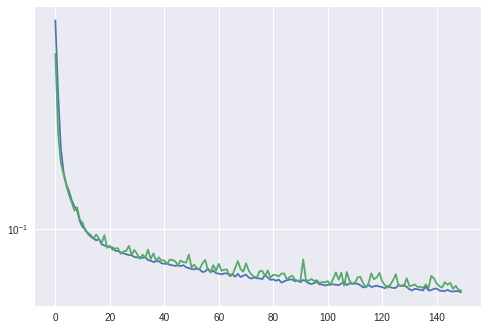

In [19]:
plt.yscale('log')
plt.plot(loss)
plt.plot(val_loss)
plt.show()